# Solution of the Poisson equation

Let $u:\Omega\to \mathbb{R}$ 
$$-\Delta u(x)=f(x), \text{ with  }x\in\Omega,$$
$$u(x)=g(x),\text{ with  }x\in\partial\Omega,$$
where $f\in L^2(\Omega)$, we want to find $u\in H^1{\Omega}$ that satisfies the last equation. 

Let $v\in C^{\infty}_0(\Omega)\to \mathbb{R}$,

$$-\int_\Omega \Delta u(x)v(x)\,dx=\int_\Omega   f(x) v(x)\,dx$$

we can used the integration by parts and we have

$$-\int_\Omega \Delta u(x)v(x)\,dx=\int_\Omega \nabla u(x)\cdot \nabla v(x)\,dx-\int_{\partial \Omega}v(x)(\nabla u(x)\cdot\vec{r}(x))dS,$$

thus we need to find $u\in H^1_0(\Omega)$ that satisfies the following equation
$$\int_\Omega \nabla u(x)\cdot \nabla v(x)\,dx=\int_\Omega f(x) v(x)\,dx,$$
$$u(x)=g(x),\text{ with  }x\in\partial\Omega.$$

Note that we define the billienar form $$A(u,v)=\int_\Omega \nabla u(x)\cdot \nabla v(x)\,dx,$$ and the linear form $$b(v)=\int_\Omega f(x) v(x)\,dx,$$


# Example

Let $\Omega=[0,1]\times[0,1]$, $f(x)=-6$, $g(x)=1+x^2+2y^2$ the solution of Poisson problem is  $u_e(x)=1+x^2+2y^2$. We want to find $u\in H^1_0(\Omega)$ that satisfies the last equation.

In [59]:
from dolfin import *
import matplotlib.pyplot as plt

In [60]:
# create mesh and define function space
mesh = UnitSquareMesh(6, 4)
V=FunctionSpace(mesh, 'P', 1)
# note: V is a FunctionSpace object
# we can use 'Lagrange' instead of 'P' to define the space of linear functions of lagrange type

# define boundary condition
u0=Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def u0_boundary(x, on_boundary):
    return on_boundary

bc=DirichletBC(V, u0, u0_boundary)

In [61]:
# define variational problem
u=TrialFunction(V)
v=TestFunction(V)
f=Constant(-6.0)
# note: f is a Constant object, we can use the
# f=Expression('-6', degree=0), her we can use the grade 0 because the function is constant
a=inner(nabla_grad(u), nabla_grad(v))*dx

# Here we can use the following line instead of the previous one
# a=dot(grad(u), grad(v))*dx
# nabla_grad and grad are equivalent, but the first one is more general
# and can be used for higher order elements

L=f*v*dx



In [62]:
# compute solution
u=Function(V)
solve(a == L, u, bc,solver_parameters={"linear_solver": "cg","preconditioner": "ilu"})
# we can add the parameter to solve the problem with the conjugate gradient method
# the software use sparse LU factorization by default to solve the linear system
#solver_parameters={"linear_solver": "cg","preconditioner":"ilu"}
# the cg mean that we are using the conjugate gradient method
# the ilu is the incomplete LU factorization to precondition the system
## Alternative notation
#solve(a == L, u, bc,solver_parameters=dict(linear_solver="cg",preconditioner="ilu"))

Solving linear variational problem.
  0 KSP preconditioned resid norm 1.317220062685e+01 true resid norm 1.110103709981e+01 ||r(i)||/||b|| 1.000000000000e+00
  1 KSP preconditioned resid norm 3.962956135271e-01 true resid norm 5.304262236383e-01 ||r(i)||/||b|| 4.778168191577e-02
  2 KSP preconditioned resid norm 1.849611888270e-02 true resid norm 2.290279473286e-02 ||r(i)||/||b|| 2.063122078320e-03
  3 KSP preconditioned resid norm 9.594039656158e-04 true resid norm 1.507052042942e-03 ||r(i)||/||b|| 1.357577701427e-04
  4 KSP preconditioned resid norm 6.484512846280e-05 true resid norm 9.928864575493e-05 ||r(i)||/||b|| 8.944087373299e-06
  5 KSP preconditioned resid norm 4.515606708685e-06 true resid norm 8.272035030761e-06 ||r(i)||/||b|| 7.451587591670e-07


In [63]:
# shows the list of parameters of the solver
info(parameters, True)

<Parameter set "dolfin" containing 21 parameter(s) and parameter set(s)>

  dolfin                          |    type        value                                         range  access  change
  --------------------------------------------------------------------------------------------------------------------
  ParMETIS_repartitioning_weight  |  double  1000.000000                                       Not set       0       0
  allow_extrapolation             |    bool            0                                       Not set       0       0
  dof_ordering_library            |  string       SCOTCH                         [Boost,SCOTCH,random]       0       0
  ghost_mode                      |  string         none             [none,shared_facet,shared_vertex]       0       0
  graph_coloring_library          |  string        Boost                                       [Boost]       0       0
  linear_algebra_backend          |  string        PETSc                                 [Eig

In [64]:
# we can change the parameters of the solver
prm = parameters["krylov_solver"] # short form
prm["absolute_tolerance"] = 1E-10
prm["relative_tolerance"] = 1E-6
prm["maximum_iterations"] = 1000
prm["monitor_convergence"] = True  # print convergence
solve(a == L, u, bc,solver_parameters={"linear_solver": "cg","preconditioner": "ilu"})

Solving linear variational problem.
  0 KSP preconditioned resid norm 1.317220062685e+01 true resid norm 1.110103709981e+01 ||r(i)||/||b|| 1.000000000000e+00
  1 KSP preconditioned resid norm 3.962956135271e-01 true resid norm 5.304262236383e-01 ||r(i)||/||b|| 4.778168191577e-02
  2 KSP preconditioned resid norm 1.849611888270e-02 true resid norm 2.290279473286e-02 ||r(i)||/||b|| 2.063122078320e-03
  3 KSP preconditioned resid norm 9.594039656158e-04 true resid norm 1.507052042942e-03 ||r(i)||/||b|| 1.357577701427e-04
  4 KSP preconditioned resid norm 6.484512846280e-05 true resid norm 9.928864575493e-05 ||r(i)||/||b|| 8.944087373299e-06
  5 KSP preconditioned resid norm 4.515606708685e-06 true resid norm 8.272035030761e-06 ||r(i)||/||b|| 7.451587591670e-07


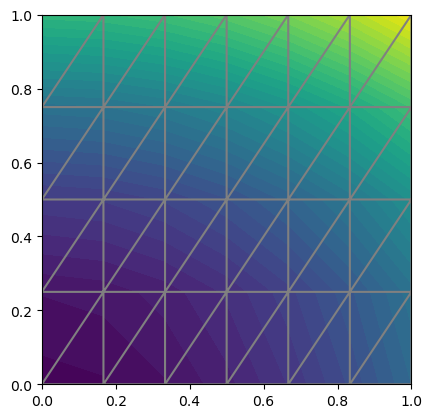

In [65]:
plot(u)
plot(mesh)
file = File("solve/basic/poisson.pvd")
file << u

# A variable - coefficient Poisson equation

Suppose we have the following Poisson equation

$$-\nabla \cdot(\alpha(x)\nabla u(x))=f(x), \text{ with  }x\in\Omega,$$
$$u(x,y)=u_0(x,y)$$
where $u_e(x,y)=1+x^2+2y^2$ and $\alpha(x,y)=x+y$, and $u_0(x,y)=u_e(x,y)$, the function $f(x,y)=-8x-10y$.
We want to find $u\in H^1_0(\Omega)$ that satisfies the last equation. 

$$-\int_\Omega \nabla \cdot(\alpha(x)\nabla u(x))v(x)\,dx=\int_\Omega f(x) v(x)\,dx,$$
$$\int_\Omega \alpha(x) \nabla u(x)\cdot \nabla v(x)\,dx-\int_{\partial \Omega}\alpha(x)\frac{\partial u }{\partial n}v\,ds=\int_\Omega f(x) v(x)\,dx,$$

thus we can write the bilinear form as

$$a(u,v)=\int_\Omega \alpha(x) \nabla u(x)\cdot \nabla v(x)\,dx,$$ 

and the linear form $$b(v)=\int_\Omega f(x) v(x)\,dx.$$

In [66]:
from dolfin import *
import matplotlib.pyplot as plt

# create mesh and define function space
mesh = UnitSquareMesh(6, 4)
V=FunctionSpace(mesh, 'P', 1)

# define boundary condition
u0=Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def u0_boundary(x, on_boundary):
    return on_boundary

bc=DirichletBC(V, u0, u0_boundary)

# define variational problem
u=TrialFunction(V)
v=TestFunction(V)
f=Expression('-8.0*x[0] -10.0* x[1]', degree=2)
alpha=Expression('x[0] + x[1]', degree=2)



a=alpha*inner(nabla_grad(u), nabla_grad(v))*dx
L=f*v*dx

# compute solution
u=Function(V)
solve(a == L, u, bc)

Solving linear variational problem.


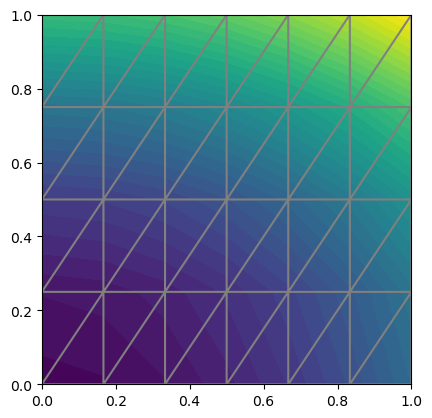

In [67]:
plot(u)
plot(mesh)
file = File("solve/alpha/poisson.pvd")
file << u

# Solution of the Poisson equation

Let $u:\Omega\to \mathbb{R}$ 
$$-\Delta u(x)=f(x), \text{ with  }x\in\Omega,$$
$$u(x)=u_o(x),\text{ with  }x\in\Tau_D,$$
$$-\frac{\partial u(x)}{\partial n}=g(x),\text{ with  }x\in\Tau_N,$$
where  $\Tau_N \cup \Tau_D=\partial\Omega$ and $f\in L^2(\Omega)$, we want to find $u\in H^1({\Omega})$ that satisfies the last equation. 

We define $\Omega=[0,1]\times[0,1]$
$$u_e=1+x^2+2y^2,$$ 
 $$f=-6,$$ 
 $$g=\begin{cases} -4 & \text{if } y=1\\ 0 & \text{if }  y=0\end{cases},$$
  $$u_0=1+x^2+2y^2.$$
Note tha function $g$ is possible rewrite as $g(x,y)=-4y$.

$$-\int_\Omega \Delta uv\,dx=\int_\Omega   f v\,dx$$
$$-\int_\Omega \Delta u v\,dx=\int_\Omega \nabla u \cdot \nabla v\,dx-\int_{\partial \Omega}\frac{\partial u}{\partial n}v dS,$$
and since $v=0$ in $\Tau_D$, thus
$$-\int_{\partial \Omega}\frac{\partial u}{\partial n}v dS=-\int_{\partial \Tau_N}\frac{\partial u}{\partial n}v\, dS=\int_{\partial \Tau_N}gv\, dS$$
in this manner we have the variational problem
$$\int_\Omega \nabla u \cdot \nabla v\,dx=\int_\Omega fv\,dx-\int_{\partial \Tau_N}gv\, dS,$$

Therefore, we can write the bilinear form as
$$a(u,v)=\int_\Omega \nabla u \cdot \nabla v\,dx,$$
and the linear form
$$b(v)=\int_\Omega fv\,dx-\int_{\partial \Tau_N}gv\, dS.$$

In [68]:
from dolfin import *
import numpy

# Create mesh and define function space
mesh = UnitSquareMesh(6, 4)
V = FunctionSpace(mesh, 'Lagrange', 1)


# Define Dirichlet boundary conditions
u0=Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

#first_alternativa = 
'''
def Dirichlet_boundary(x, on_boundary):
    if on_boundary:
        if x[0] == 0 or x[0] == 1:
            return True
        else:
            return False
        else:
        return False
        '''
# Second alternativa
'''
def Dirichlet_boundary(x, on_boundary):
return on_boundary and (x[0] == 0 or x[0] == 1)

'''
# Third alternativa
'''
def Dirichlet_boundary(x, on_boundary):
    tol = 1E-14 # tolerance for coordinate comparisons
    return on_boundary and \
        (abs(x[0]) < tol or abs(x[0] - 1) < tol)
'''
class DirichletBoundary(SubDomain):
    def inside(self, x, on_boundary):
        tol = 1E-14   # tolerance for coordinate comparisons
        return on_boundary and \
               (abs(x[0]) < tol or abs(x[0] - 1) < tol)

u0_boundary = DirichletBoundary()
bc = DirichletBC(V, u0, u0_boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
g = Expression('-4*x[1]', degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx - g*v*ds

# Compute solution
u = Function(V)
solve(a == L, u, bc)

Solving linear variational problem.


In [69]:
# Verification
Ve=FunctionSpace(mesh, 'Lagrange', 3)
u_e_Ve=interpolate(u0, Ve)
error=(u-u_e_Ve)**2*dx
E=sqrt(assemble(error))
print('E =', E)

E = 0.02719291695479303


In [70]:
# other alternative to calculate the error
Ve=FunctionSpace(mesh, 'Lagrange', 2)
u_e_Ve=interpolate(u0, Ve)
error=errornorm(u_e_Ve, u, 'L2')
print('E =', error)

E =*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
 0.027192916954793225


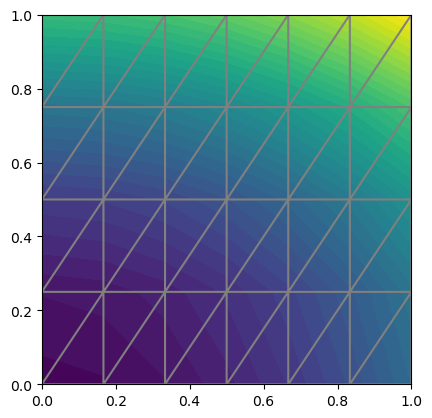

In [71]:
plot(u)
plot(mesh)
file = File("solve/Newman/poisson.pvd")
file << u

# Multiple Conditions

$$-\Delta u =-6, \text{ with  }x\in\Omega,$$
$$u=u_L,\text{ on   } \Tau_0,$$
$$u=u_R,\text{ on  } \Tau_1,$$
$$-\frac{\partial u}{\partial n}=g,\text{ on }\Tau_N,$$

Here $\Tau_0$ is the boundary $x=0$, while $\Tau_1$ corresponds to the boundary $x=1$, and $u_L=1+2y\ 2$ and $u_R=2+2y^2$ and $g=-4y$. 

The boundary $\Tau_N$ is the boundary $y=1$.


In [77]:

from dolfin import *
import numpy

# Create mesh and define function space
mesh = UnitSquareMesh(6, 4)
V = FunctionSpace(mesh, 'Lagrange', 1)

# Define Dirichlet conditions for x=0 boundary

u_L = Expression('1 + 2*x[1]*x[1]', degree=2)
def LeftBoundary(x, on_boundary):
    tol = 1E-14 # tolerance for coordinate comparisons
    return on_boundary and abs(x[0]) < tol
Gamma_0 = DirichletBC(V, u_L, LeftBoundary)

# Define Dirichlet conditions for x=1 boundary

u_R = Expression('2 + 2*x[1]*x[1]', degree=2)

def RightBoundary(x, on_boundary):
    tol = 1E-14 # tolerance for coordinate comparisons
    return on_boundary and abs(x[0] - 1) < tol
 
Gamma_1 = DirichletBC(V, u_R, RightBoundary)

bcs = [Gamma_0, Gamma_1]


Solving linear variational problem.


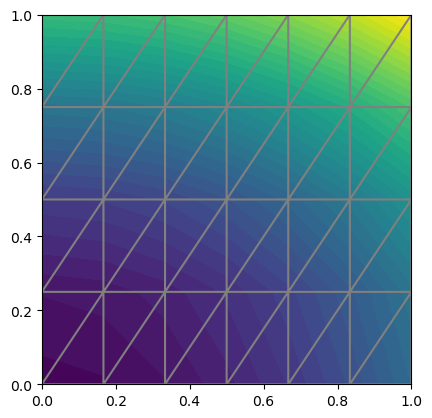

In [79]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
g = Expression('-4*x[1]', degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx - g*v*ds

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

plot(u)
plot(mesh)
file = File("solve/Multiple/poisson.pvd")
file << u